# Get Bin Centers of Kinematic Bins

### This code's intended use is to print information pertaining to the statistical centers of the kinematic bins

Give this code an up-to-date version of the experimental data plots (with cuts) for the Q2 vs y AND z vs pT plots

In [2]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(f"{color.BOLD}\nStarting RG-A SIDIS Analysis\n{color.END}")


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["Ran on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")


Starting RG-A SIDIS Analysis

Ran on 7-30-2024 at 7:05 p.m.



.

.

.

## Load Data File(s)

In [5]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"
# Smearing_Options = "smear"

Common_Name = "Pass_2_New_Sector_Cut_Test_V12_All"
Common_Name = "Tagged_Proton_Pass_2_New_Fiducial_Cut_Test_V2_All"
Common_Name = "Pass_2_New_Fiducial_Cut_Test_V2_All"

Standard_Histogram_Title_Addition = ""
Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    Standard_Histogram_Title_Addition = Pass_Version
    
if("Tagged_Proton" in Common_Name):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Standard_Histogram_Title_Addition} - Tagged Proton"
    else:
        Standard_Histogram_Title_Addition = "Tagged Proton"
    print(f"{color.BGREEN}\nRunning with 'Tagged Proton' files{color.END}")
print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
#     MC_REC_File_Name = Common_Name
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
if((Pass_Version not in ["Pass 2"]) and ("Pass_2_" in str(MC_REC_File_Name))):
    print(f"{color.Error}Error: 'MC_REC_File_Name' includes 'Pass_2' in name when not appropriate...{color.END}\n\t(MC_REC_File_Name = {MC_REC_File_Name})")
    MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Generated Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in       'Pass_2_New_Fiducial_Cut_Test_V2_All' is 364
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unsmeared_Pass_2_New_Fiducial_Cut_Test_V2_All' is 800
The total number of histograms available for the Generated Monte Carlo Data in     'Pass_2_New_Sector_Cut_Test_V9_All' is 416

Pass Version in use is: Pass 2


Done Loading RDataFrame files...




Error in <TList::Clear>: A list is accessing an object (0x55a4e9a96640) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a96ab0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a96e30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a97010) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a97300) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a975f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a97a70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a97ec0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55a4e9a98290) already deleted (list name = TList)
Error in <TList::Clear>: A l

.

.

.

## Checking DataFrame(s) for required histograms

In [6]:
Check_Inputs     = not True
Check_Inputs_All = not True

if(Check_Inputs):
    print("")
    
Use_xB = not True
Data_Frame = "rdf"
df = rdf   # Make sure df and Data_Frame are set to the same file
Cut_Type   = "cut_Complete_SIDIS"
print(f"{color.BOLD}DataFrame in use = {color.UNDERLINE}{Data_Frame}{color.END}\n")
# Select only one dataframe at a time (default should be 'rdf')
histo_count = 0
for df_name in df.GetListOfKeys():
    if(f"'{Data_Frame}'" in str(df_name.GetName())):
        # Looking for one DataFrame type at a time
        if("Normal_2D" in str(df_name.GetName())):
            # Only looking for the 2D Histograms
            if(f"(Data-Cut='{Cut_Type}')" in str(df_name.GetName())):
                # Only looking for the Histograms with all the regular SIDIS cuts (or whatever 'Cut_Type' is set to)
                if(("Var-D2='xB'" in str(df_name.GetName())) and (not Use_xB)):
                    # Not looking for the Q2 vs xB plots (right now - will include xB if 'Use_xB' is set to 'True')
                    continue
                if("Var-D1='Q2'" in str(df_name.GetName())):
                    histo_count += 1
                    if(Check_Inputs):
                        print(f"{color.BOLD}Histo {histo_count}:{color.BBLUE}\n\t {df_name.GetName()}{color.END}\n")
                if("Var-D1='z'"  in str(df_name.GetName())):
                    histo_count += 1
                    if(Check_Inputs):
                        print(f"{color.BOLD}Histo {histo_count}:{color.BGREEN}\n\t {df_name.GetName()}{color.END}\n")
        if(Check_Inputs_All):
            print(f"{color.RED}\t {df_name.GetName()}{color.END}\n")
    else:
        print(f"{color.Error}Could not find the correct dataframe type (i.e., '{Data_Frame}'){color.END}")
        break
        
if(histo_count not in [36, 54]):
    print(f"{color.Error}histo_count (Total) = {histo_count} is the incorrect number of histograms{color.END_R}\n\tCheck input file with 'Check_Inputs' or 'Check_Inputs_All'{color.END}")
else:
    print(f"{color.BOLD}histo_count (Total) = {histo_count}{color.END}\n")   
print("Done")

DataFrame in use = rdf

histo_count (Total) = 36

Done


.

.

.

## Drawing Histograms


Done


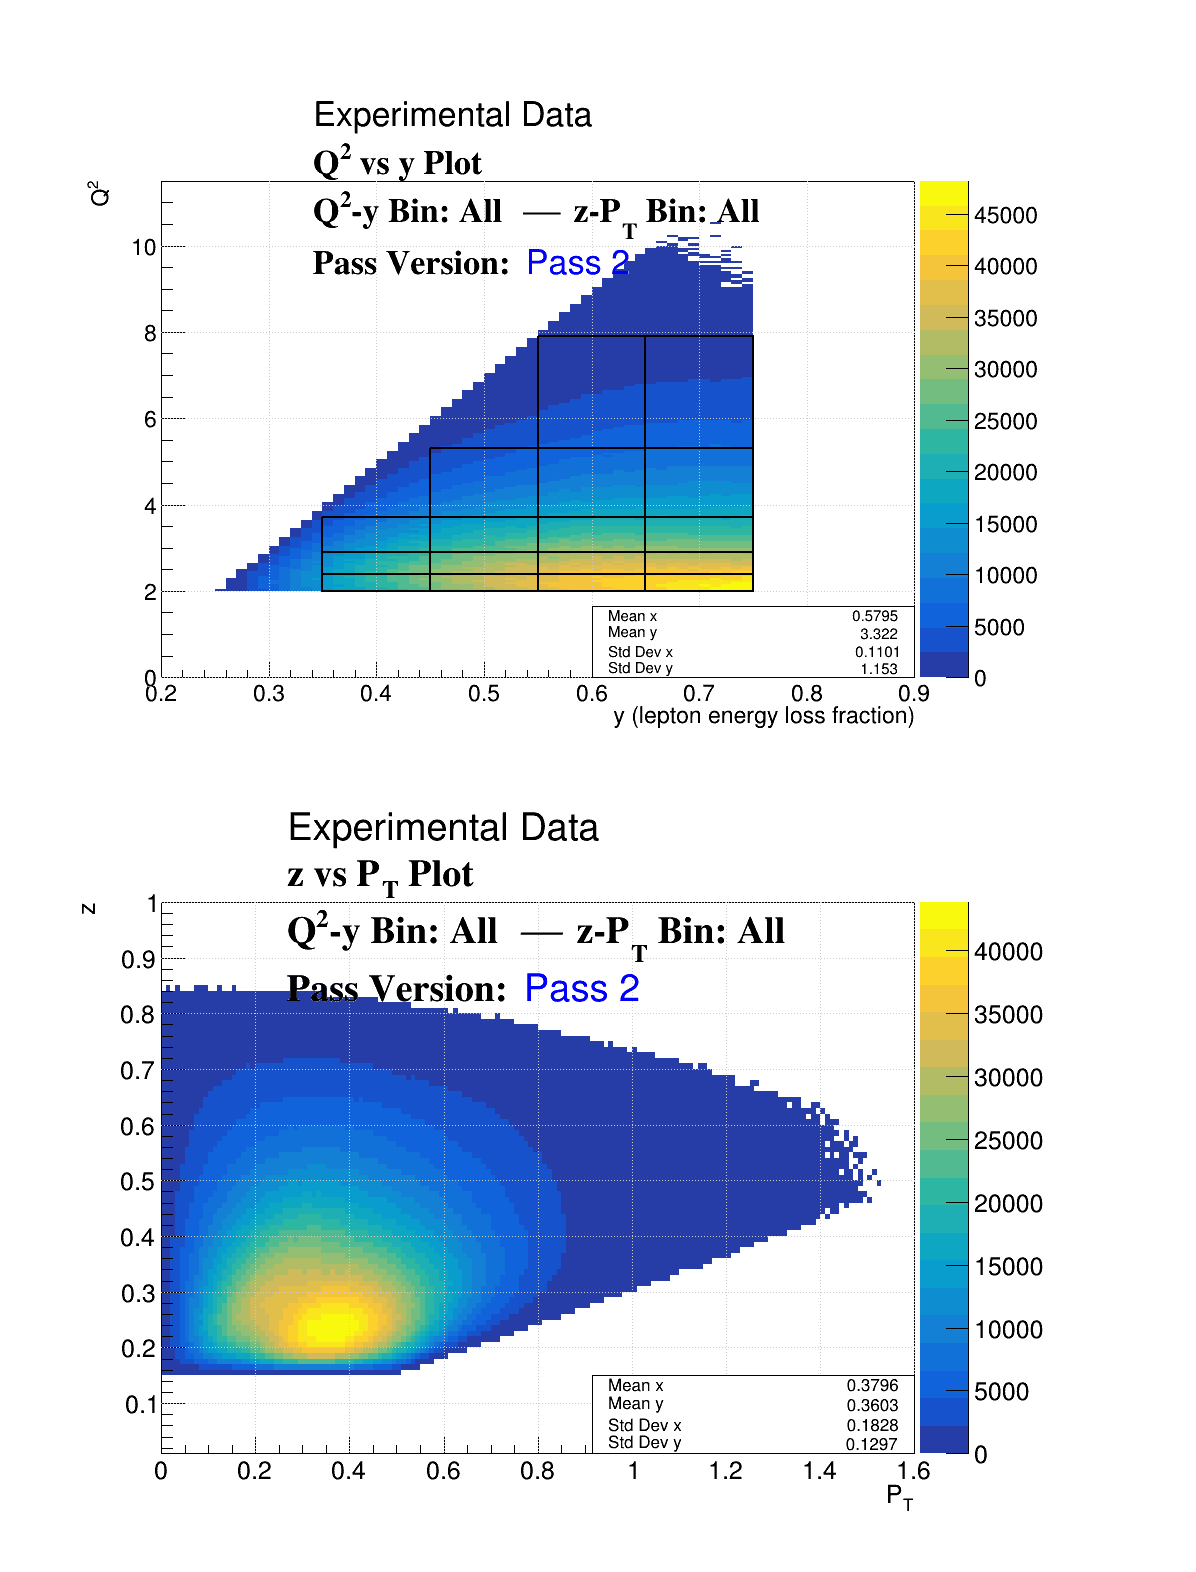

In [7]:
Draw_Histos   = True
Save_Histos   = not True
Print_Centers = not True

Q2_y_borders = {}
for Q2_Y_Bin_ii in range(1, 18, 1):
    Q2_y_borders[Q2_Y_Bin_ii] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    Q2_y_borders[f"{Q2_Y_Bin_ii}_RED"] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    for line in Q2_y_borders[f"{Q2_Y_Bin_ii}_RED"]:
        line.SetLineColor(ROOT.kRed)
        line.SetLineWidth(5)
statbox, Q2_vs_xB_Histo, Q2_vs_y_Histo, z_vs_pT_Histo, canvas_main = {}, {}, {}, {}, {}
Final_Output = {}
Final_Output["Key"] = ["mean_Q2", "ErrorQ2", "mean__y", "Error_y", "mean__z", "Error_z", "mean_pT", "ErrorpT"]
if(Use_xB):
    Final_Output["Key"].append("mean_xB")
    Final_Output["Key"].append("ErrorxB")
    
    
Select_Q2_y_Bin = range(1, 18)
Select_Q2_y_Bin = [0]

Skip_z_pT_Q = True
    
for Q2_y_Bin in range(0, 18):
    if(Q2_y_Bin not in Select_Q2_y_Bin):
        continue
    if(Q2_y_Bin     in [0]):
        Q2_y_Bin = "All"
    Q2_vs_y_Name      = f"((Histo-Group='Normal_2D'), (Data-Type='{Data_Frame}'), (Data-Cut='{Cut_Type}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
    z_vs_pT_Name      = f"((Histo-Group='Normal_2D'), (Data-Type='{Data_Frame}'), (Data-Cut='{Cut_Type}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
    Q2_vs_y_Histo[f"({Q2_y_Bin})"] = df.Get(Q2_vs_y_Name)
    z_vs_pT_Histo[f"({Q2_y_Bin})"] = df.Get(z_vs_pT_Name)
    if(Use_xB):
        Q2_vs_xB_Name = f"((Histo-Group='Normal_2D'), (Data-Type='{Data_Frame}'), (Data-Cut='{Cut_Type}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))"
        Q2_vs_xB_Histo[f"({Q2_y_Bin})"] = df.Get(Q2_vs_xB_Name)
    
    z_pT_Bin_List = ["All"]
    if(not Skip_z_pT_Q):
        # z_pT_Bin_List = range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1)
        z_pT_Bin_List.extend(range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1))
    for z_pT_Bin in z_pT_Bin_List:
        if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin, BINNING_METHOD="_Y_bin")):
            continue
            
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_y_Histo[f"({Q2_y_Bin})"].Clone(Q2_vs_y_Name.replace("z-PT-Bin=All",  f"z-PT-Bin={z_pT_Bin}"))
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = z_vs_pT_Histo[f"({Q2_y_Bin})"].Clone(z_vs_pT_Name.replace("z-PT-Bin=All",  f"z-PT-Bin={z_pT_Bin}"))
        
        if(z_pT_Bin not in ["All", "0", 0]):
            Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(z_pT_Bin, z_pT_Bin)
            z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(z_pT_Bin, z_pT_Bin)
        else:
            Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(-0.5 if(Skip_z_pT_Q) else 0.5, 50)
            z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(-0.5 if(Skip_z_pT_Q) else 0.5, 50)
        
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Project3D("yz")
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Project3D("yz")
        
        Kinematic_Bin = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), " #topbar z-P_{T} Bin: ", str(z_pT_Bin)])

        Q2_vs_y_Title = "".join(["#splitline{#splitline{#splitline{", "Experimental" if(str(Data_Frame) in ["rdf"]) else "MC REC" if(str(Data_Frame) in ["mdf"]) else "MC GEN" if(str(Data_Frame) in ["gdf"]) else "ERROR", " Data}{", str(root_color.Bold), "{Q^{2} vs y Plot}}}{", str(root_color.Bold), "{", str(Kinematic_Bin), "}}}{", str(root_color.Bold), "{Pass Version:} #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
        z_vs_pT_Title = "".join(["#splitline{#splitline{#splitline{", "Experimental" if(str(Data_Frame) in ["rdf"]) else "MC REC" if(str(Data_Frame) in ["mdf"]) else "MC GEN" if(str(Data_Frame) in ["gdf"]) else "ERROR", " Data}{", str(root_color.Bold), "{z vs P_{T} Plot}}}{", str(root_color.Bold), "{", str(Kinematic_Bin), "}}}{", str(root_color.Bold), "{Pass Version:} #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])

        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetTitle(Q2_vs_y_Title)
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetTitle(z_vs_pT_Title)
        
        if(Use_xB):
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_xB_Histo[f"({Q2_y_Bin})"].Clone(Q2_vs_xB_Name.replace("z-PT-Bin=All", f"z-PT-Bin={z_pT_Bin}"))
            if(z_pT_Bin not in ["All", "0", 0]):
                Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(z_pT_Bin, z_pT_Bin)
            else:
                Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(-0.5 if(Skip_z_pT_Q) else 0.5, 50)
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Project3D("yz")
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetTitle(Q2_vs_y_Title.replace("y Plot", "x_{B} Plot"))
        
        # Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetTitleOffset(8.2, 't')
        # print(Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetTitleOffset('t'))
        # print(z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetTitleOffset('t'))
        
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetYaxis().SetRangeUser(0 if(Skip_z_pT_Q) else 0.5, 11.5 if(Skip_z_pT_Q) else 9)
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(0.2, 0.9)
        if(Use_xB):
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetYaxis().SetRangeUser(0.5, 9)
        
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetYaxis().SetRangeUser(0.01, 1.0 if(Skip_z_pT_Q) else 0.8)
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetXaxis().SetRangeUser(0,    1.6 if(Skip_z_pT_Q) else 1.1)

#         canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"] = Canvas_Create(Name=f"({Q2_y_Bin}, {z_pT_Bin})", Num_Columns=3 if(Use_xB) else 2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
        canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"] = Canvas_Create(Name=f"({Q2_y_Bin}, {z_pT_Bin})", Num_Columns=1, Num_Rows=3 if(Use_xB) else 2, Size_X=1200, Size_Y=1600, cd_Space=0)
        Draw_Canvas(canvas=canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Draw("colz")
        Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetStats(ROOT.kTRUE)  # Ensure statistics box is enabled
        ROOT.gStyle.SetOptStat(1100)  # '11' means decimal part of precision, '00'
        
        statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetListOfFunctions().FindObject("stats")
        if(statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"]):
            statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"].SetX1NDC(0.55)   # X position of left edge
            statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"].SetX2NDC(0.85)  # X position of right edge
            statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"].SetY1NDC(0.15)  # Y position of bottom edge
            statbox[f"Q2_vs_y_({Q2_y_Bin}, {z_pT_Bin})"].SetY2NDC(0.25)  # Y position of top edge
        for Q2_Y_Bin_ii in range(1, 18, 1):
            for line in Q2_y_borders[Q2_Y_Bin_ii]:
                line.SetLineColor(ROOT.kBlack)
                line.SetLineWidth(2)
                line.Draw("same")
        if(Q2_y_Bin not in [0, "All"]):
            for line_current in Q2_y_borders[f"{Q2_y_Bin}_RED"]:
                line_current.Draw("same")
            
        Draw_Canvas(canvas=canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Draw("colz")
        z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetStats(ROOT.kTRUE)  # Ensure statistics box is enabled
        ROOT.gStyle.SetOptStat(1100)  # '11' means decimal part of precision, '00'
        statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"] = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetListOfFunctions().FindObject("stats")
        if(statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"]):
            statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"].SetX1NDC(0.55)   # X position of left edge
            statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"].SetX2NDC(0.85)  # X position of right edge
            statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"].SetY1NDC(0.15)  # Y position of bottom edge
            statbox[f"z_vs_pT_({Q2_y_Bin}, {z_pT_Bin})"].SetY2NDC(0.25)  # Y position of top edge
        if(Q2_y_Bin not in ["All", "0", 0]):
            Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=int(Q2_y_Bin), Set_Max_Y=1.2, Set_Max_X=1.2, Plot_Orientation_Input="z_pT")
            
        if(Use_xB):
            Draw_Canvas(canvas=canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"], cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].Draw("colz")
            Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].SetStats(ROOT.kTRUE)  # Ensure statistics box is enabled
            ROOT.gStyle.SetOptStat(1100)  # '11' means decimal part of precision, '00'
            statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"] = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetListOfFunctions().FindObject("stats")
            if(statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"]):
                statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"].SetX1NDC(0.55)   # X position of left edge
                statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"].SetX2NDC(0.85)  # X position of right edge
                statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"].SetY1NDC(0.15)  # Y position of bottom edge
                statbox[f"Q2_vs_xB_({Q2_y_Bin}, {z_pT_Bin})"].SetY2NDC(0.25)  # Y position of top edge
            
        mean_Q2 = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(2)  # 2 denotes the Y-axis
        mean__y = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(1)  # 1 denotes the X-axis
        Q2_vs_y_entries = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetEntries()
        sdev_Q2 = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetStdDev(2)
        sdev__y = Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetStdDev(1)
        ErrorQ2 = (sdev_Q2/ROOT.sqrt(Q2_vs_y_entries)) if(Q2_vs_y_entries > 0) else 0
        Error_y = (sdev__y/ROOT.sqrt(Q2_vs_y_entries)) if(Q2_vs_y_entries > 0) else 0
        
        mean__z = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(2)  # 2 denotes the Y-axis
        mean_pT = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(1)  # 1 denotes the X-axis
        z_vs_pT_entries = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetEntries()
        sdev__z = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetStdDev(2)
        sdev_pT = z_vs_pT_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetStdDev(1)
        Error_z = (sdev__z/ROOT.sqrt(z_vs_pT_entries)) if(z_vs_pT_entries > 0) else 0
        ErrorpT = (sdev_pT/ROOT.sqrt(z_vs_pT_entries)) if(z_vs_pT_entries > 0) else 0
        
        if(Use_xB):
            mean_xB     = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(1)  # 1 denotes the X-axis
            mean_Q2_xB  = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(2)
            Q2_vs_xB_entries = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetEntries()
            sdev_xB = Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetStdDev(1)
            ErrorxB = (sdev_xB/ROOT.sqrt(Q2_vs_xB_entries)) if(Q2_vs_xB_entries > 0) else 0
            if(round(mean_Q2, 3) != round(mean_Q2_xB, 3)):
                print(f"""{color.Error}
Q2_vs_y_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(2)  = {mean_Q2}
Q2_vs_xB_Histo[f"({Q2_y_Bin}, {z_pT_Bin})"].GetMean(2) = {mean_Q2_xB}
{color.END}""")
            if(Print_Centers):
                print(f"For ({Q2_y_Bin}-{z_pT_Bin}):\t [mean_Q2, ErrorQ2, mean__y, Error_y, mean__z, Error_z, mean_pT, ErrorpT, mean_xB, ErrorxB] = [{round(mean_Q2, 3)}, {round(ErrorQ2, 7)}, {round(mean__y, 4)}, {round(Error_y, 7)}, {round(mean__z, 4)}, {round(Error_z, 7)}, {round(mean_pT, 4)}, {round(ErrorpT, 7)}, {round(mean_xB, 4)}, {round(ErrorxB, 7)}]")
            Final_Output[f"{Q2_y_Bin}-{z_pT_Bin}"] = [round(mean_Q2, 3), round(ErrorQ2, 7), round(mean__y, 4), round(Error_y, 7), round(mean__z, 4), round(Error_z, 7), round(mean_pT, 4), round(ErrorpT, 7), round(mean_xB, 4), round(ErrorxB, 7)]
        else:
            if(Print_Centers):
                print(f"For ({Q2_y_Bin}-{z_pT_Bin}):\t [mean_Q2, ErrorQ2, mean__y, Error_y, mean__z, Error_z, mean_pT, ErrorpT] = [{round(mean_Q2, 3)}, {round(ErrorQ2, 7)}, {round(mean__y, 4)}, {round(Error_y, 7)}, {round(mean__z, 4)}, {round(Error_z, 7)}, {round(mean_pT, 4)}, {round(ErrorpT, 7)}]")
            Final_Output[f"{Q2_y_Bin}-{z_pT_Bin}"] = [round(mean_Q2, 3), round(ErrorQ2, 7), round(mean__y, 4), round(Error_y, 7), round(mean__z, 4), round(Error_z, 7), round(mean_pT, 4), round(ErrorpT, 7)]
            
        if(Draw_Histos):
            canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"].Draw()
        if(Save_Histos):
            Save_Name = f"Normal_2D_Histos_For_Q2_y_Bin_{Q2_y_Bin}_z_pT_Bin_{z_pT_Bin}.pdf"
            canvas_main[f"({Q2_y_Bin}, {z_pT_Bin})"].SaveAs(Save_Name)
            print(f"\n{color.BBLUE}Saved: {color.UNDERLINE}{Save_Name}{color.END}\n")
            

print(f"\n{color.BOLD}Done{color.END}")

.

.

.

# Making Final Output
Use the final text printed from this cell as the reference for bin centers

In [13]:
print("".join([f"""{color.BOLD}

Get_Bin_Center_Dictionary = {Final_Output}
""", """
def Get_Bin_Center_Function(Q2_y_Bin, z_pT_Bin, Variable="All"):
    if(str(z_pT_Bin) in ["0", 0, "all"]):
        z_pT_Bin = "All"
    if(Variable in ["All"]):
        return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]
    else:
        if(str(Variable) in ["mean_Q2",  "Q2"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][0]
        if(str(Variable) in ["Error_Q2", "error_Q2"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][1]
        if(str(Variable) in ["mean_y",   "y"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][2]
        if(str(Variable) in ["Error_y",  "error_y"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][3]
        if(str(Variable) in ["mean_z",   "z"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][4]
        if(str(Variable) in ["Error_z",  "error_z"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][5]
        if(str(Variable) in ["mean_pT",  "pT"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][6]
        if(str(Variable) in ["Error_pT", "error_pT"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][7]
        if(str(Variable) in ["mean_xB",  "xB"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][8]
        if(str(Variable) in ["Error_xB", "error_xB"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][9]
    print(f"POTENTIAL ERROR: Get_Bin_Center_Function({Q2_y_Bin}, {z_pT_Bin}, {Variable}) did not return anything yet... (returning Variable='All')")
    return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]
""", color.END]))
print("\n\nDone")



Get_Bin_Center_Dictionary = {'Key': ['mean_Q2', 'ErrorQ2', 'mean__y', 'Error_y', 'mean__z', 'Error_z', 'mean_pT', 'ErrorpT', 'mean_xB', 'ErrorxB'], '1-All': [2.193, 6.27e-05, 0.7002, 1.57e-05, 0.3052, 6.46e-05, 0.4127, 9.97e-05, 0.1577, 6.2e-06], '1-1': [2.197, 0.0004086, 0.6936, 0.0001008, 0.5021, 0.0002779, 0.1529, 0.0001633, 0.1594, 4.07e-05], '1-2': [2.195, 0.0003841, 0.6962, 9.6e-05, 0.4988, 0.0002533, 0.2724, 9.62e-05, 0.1587, 3.82e-05], '1-3': [2.193, 0.0003505, 0.6968, 8.78e-05, 0.4996, 0.0002323, 0.3709, 8.81e-05, 0.1585, 3.48e-05], '1-4': [2.193, 0.000347, 0.6973, 8.68e-05, 0.4996, 0.0002285, 0.4696, 8.67e-05, 0.1583, 3.44e-05], '1-5': [2.193, 0.0003519, 0.6976, 8.82e-05, 0.5011, 0.0002326, 0.5731, 9.71e-05, 0.1583, 3.49e-05], '1-6': [2.192, 0.0003904, 0.6979, 9.79e-05, 0.5042, 0.0002594, 0.6862, 0.0001175, 0.1581, 3.87e-05], '1-7': [2.193, 0.0003957, 0.6982, 9.95e-05, 0.513, 0.0002675, 0.8469, 0.00023, 0.1581, 3.92e-05], '1-8': [2.196, 0.0003504, 0.6967, 8.74e-05, 0.3371, 

.

.

.

.

.

## Test

In [23]:
Get_Bin_Center_Dictionary = {'Key': ['mean_Q2', 'mean__y', 'mean__z', 'mean_pT', 'mean_xB'], '1-All': [2.193, 0.7002, 0.3052, 0.4127, 0.1577], '1-1': [2.197, 0.6936, 0.5021, 0.1529, 0.1594], '1-2': [2.195, 0.6962, 0.4988, 0.2724, 0.1587], '1-3': [2.193, 0.6968, 0.4996, 0.3709, 0.1585], '1-4': [2.193, 0.6973, 0.4996, 0.4696, 0.1583], '1-5': [2.193, 0.6976, 0.5011, 0.5731, 0.1583], '1-6': [2.192, 0.6979, 0.5042, 0.6862, 0.1581], '1-7': [2.193, 0.6982, 0.513, 0.8469, 0.1581], '1-8': [2.196, 0.6967, 0.3371, 0.1563, 0.1587], '1-9': [2.194, 0.6982, 0.3374, 0.2724, 0.1582], '1-10': [2.193, 0.6989, 0.3368, 0.3708, 0.1579], '1-11': [2.193, 0.6992, 0.3375, 0.469, 0.1578], '1-12': [2.193, 0.6995, 0.3389, 0.5716, 0.1578], '1-13': [2.193, 0.6997, 0.3405, 0.6838, 0.1577], '1-14': [2.192, 0.7007, 0.3434, 0.8361, 0.1575], '1-15': [2.196, 0.6976, 0.2577, 0.1546, 0.1584], '1-16': [2.194, 0.699, 0.2571, 0.2733, 0.158], '1-17': [2.192, 0.6994, 0.2572, 0.3706, 0.1578], '1-18': [2.193, 0.6994, 0.258, 0.468, 0.1578], '1-19': [2.194, 0.6999, 0.2585, 0.5701, 0.1578], '1-20': [2.193, 0.7005, 0.2596, 0.6813, 0.1576], '1-22': [2.195, 0.698, 0.2088, 0.1548, 0.1583], '1-23': [2.193, 0.6991, 0.2085, 0.2734, 0.1579], '1-24': [2.193, 0.6993, 0.2088, 0.3694, 0.1579], '1-25': [2.193, 0.6998, 0.2092, 0.4667, 0.1578], '1-26': [2.191, 0.7016, 0.2104, 0.5664, 0.1572], '1-29': [2.194, 0.7094, 0.1779, 0.1572, 0.1556], '1-30': [2.192, 0.7103, 0.1778, 0.2732, 0.1553], '1-31': [2.194, 0.7101, 0.178, 0.3684, 0.1554], '1-32': [2.192, 0.7101, 0.1781, 0.4663, 0.1553], '2-All': [2.196, 0.6005, 0.3491, 0.4043, 0.1842], '2-1': [2.197, 0.5966, 0.6019, 0.1657, 0.1855], '2-2': [2.197, 0.5969, 0.5989, 0.3013, 0.1854], '2-3': [2.196, 0.5977, 0.5982, 0.4001, 0.1851], '2-4': [2.195, 0.598, 0.5987, 0.4944, 0.1849], '2-5': [2.196, 0.5981, 0.6001, 0.6018, 0.1849], '2-6': [2.194, 0.5991, 0.6016, 0.7777, 0.1845], '2-7': [2.198, 0.5972, 0.4324, 0.1693, 0.1854], '2-8': [2.197, 0.5981, 0.4327, 0.3008, 0.185], '2-9': [2.196, 0.5989, 0.4324, 0.4001, 0.1847], '2-10': [2.195, 0.5989, 0.4326, 0.494, 0.1846], '2-11': [2.195, 0.5993, 0.4333, 0.601, 0.1845], '2-12': [2.195, 0.5999, 0.4357, 0.7699, 0.1843], '2-13': [2.197, 0.5978, 0.3424, 0.1705, 0.1852], '2-14': [2.196, 0.599, 0.3423, 0.3015, 0.1847], '2-15': [2.195, 0.599, 0.3419, 0.4003, 0.1846], '2-16': [2.196, 0.5993, 0.3421, 0.4937, 0.1846], '2-17': [2.196, 0.5995, 0.3429, 0.5993, 0.1845], '2-18': [2.194, 0.6007, 0.3444, 0.7615, 0.184], '2-19': [2.197, 0.5983, 0.2836, 0.1693, 0.185], '2-20': [2.195, 0.599, 0.2832, 0.3023, 0.1846], '2-21': [2.195, 0.5991, 0.2833, 0.3999, 0.1845], '2-22': [2.196, 0.5996, 0.2836, 0.493, 0.1845], '2-23': [2.195, 0.5995, 0.284, 0.598, 0.1844], '2-25': [2.197, 0.5983, 0.2444, 0.1689, 0.185], '2-26': [2.196, 0.5988, 0.2443, 0.3021, 0.1847], '2-27': [2.195, 0.5995, 0.2444, 0.3993, 0.1845], '2-28': [2.196, 0.5997, 0.2446, 0.4922, 0.1845], '2-29': [2.193, 0.6019, 0.2451, 0.5938, 0.1835], '2-31': [2.196, 0.607, 0.2124, 0.1708, 0.1822], '2-32': [2.195, 0.6078, 0.2121, 0.3021, 0.1818], '2-33': [2.196, 0.6079, 0.2125, 0.3981, 0.1819], '2-34': [2.194, 0.608, 0.2127, 0.4922, 0.1817], '3-All': [2.197, 0.5014, 0.3891, 0.3797, 0.2209], '3-1': [2.198, 0.4981, 0.6459, 0.1364, 0.2224], '3-2': [2.199, 0.4977, 0.6442, 0.2517, 0.2227], '3-3': [2.199, 0.497, 0.6435, 0.3449, 0.2231], '3-4': [2.199, 0.4977, 0.643, 0.4392, 0.2227], '3-5': [2.198, 0.4986, 0.6406, 0.5386, 0.2222], '3-6': [2.195, 0.5007, 0.6351, 0.6649, 0.221], '3-7': [2.199, 0.4988, 0.4746, 0.1387, 0.2223], '3-8': [2.198, 0.4978, 0.4739, 0.2514, 0.2226], '3-9': [2.198, 0.4983, 0.475, 0.3447, 0.2224], '3-10': [2.198, 0.499, 0.4745, 0.4393, 0.2221], '3-11': [2.198, 0.4989, 0.4752, 0.538, 0.2221], '3-12': [2.196, 0.4994, 0.4763, 0.6656, 0.2217], '3-13': [2.198, 0.4985, 0.3664, 0.142, 0.2223], '3-14': [2.199, 0.4977, 0.3671, 0.2501, 0.2228], '3-15': [2.198, 0.4985, 0.3664, 0.3456, 0.2223], '3-16': [2.197, 0.4987, 0.3663, 0.439, 0.2221], '3-17': [2.197, 0.4992, 0.3668, 0.5377, 0.2219], '3-18': [2.196, 0.5011, 0.3685, 0.6609, 0.2209], '3-19': [2.198, 0.4984, 0.3036, 0.1421, 0.2223], '3-20': [2.2, 0.4983, 0.3039, 0.2507, 0.2226], '3-21': [2.197, 0.4988, 0.3032, 0.346, 0.222], '3-22': [2.197, 0.4993, 0.3036, 0.4388, 0.2218], '3-23': [2.196, 0.5004, 0.3043, 0.5362, 0.2213], '3-24': [2.193, 0.5066, 0.3064, 0.6492, 0.2181], '3-25': [2.198, 0.5088, 0.2555, 0.1396, 0.2176], '3-26': [2.197, 0.5095, 0.255, 0.2529, 0.2173], '3-27': [2.196, 0.5099, 0.255, 0.3453, 0.217], '3-28': [2.197, 0.5102, 0.2554, 0.4377, 0.2169], '3-29': [2.194, 0.5118, 0.2562, 0.534, 0.216], '4-All': [2.199, 0.4046, 0.434, 0.3655, 0.2744], '4-1': [2.198, 0.4001, 0.6455, 0.136, 0.2775], '4-2': [2.199, 0.4007, 0.6435, 0.2467, 0.2772], '4-3': [2.195, 0.4023, 0.6413, 0.3353, 0.2755], '4-4': [2.196, 0.4048, 0.6387, 0.4271, 0.2738], '4-5': [2.19, 0.4133, 0.6335, 0.5369, 0.2671], '4-7': [2.203, 0.3987, 0.5422, 0.1376, 0.2792], '4-8': [2.201, 0.3982, 0.5414, 0.2475, 0.2792], '4-9': [2.202, 0.3976, 0.542, 0.3351, 0.2798], '4-10': [2.202, 0.3981, 0.542, 0.4284, 0.2795], '4-11': [2.199, 0.4002, 0.5418, 0.5405, 0.2775], '4-12': [2.188, 0.4129, 0.5397, 0.6895, 0.2672], '4-13': [2.201, 0.3994, 0.4629, 0.1403, 0.2785], '4-14': [2.201, 0.3987, 0.4624, 0.2472, 0.2789], '4-15': [2.203, 0.3976, 0.463, 0.3343, 0.2799], '4-16': [2.202, 0.3985, 0.463, 0.4289, 0.2792], '4-17': [2.199, 0.4004, 0.4632, 0.5403, 0.2774], '4-18': [2.193, 0.4094, 0.4643, 0.6873, 0.2703], '4-19': [2.2, 0.3995, 0.4036, 0.1425, 0.2782], '4-20': [2.201, 0.3988, 0.4038, 0.2467, 0.2788], '4-21': [2.203, 0.3985, 0.4041, 0.334, 0.2793], '4-22': [2.199, 0.3997, 0.4039, 0.4294, 0.278], '4-23': [2.197, 0.4031, 0.4042, 0.5385, 0.2752], '4-24': [2.193, 0.4096, 0.4054, 0.6814, 0.2702], '4-25': [2.2, 0.3998, 0.3536, 0.1434, 0.278], '4-26': [2.201, 0.3989, 0.354, 0.2457, 0.2788], '4-27': [2.2, 0.3999, 0.354, 0.3346, 0.278], '4-28': [2.198, 0.4019, 0.3541, 0.4282, 0.2763], '4-29': [2.196, 0.4062, 0.3549, 0.5362, 0.273], '4-31': [2.198, 0.4194, 0.305, 0.1429, 0.264], '4-32': [2.201, 0.4186, 0.3059, 0.2444, 0.2648], '4-33': [2.197, 0.4198, 0.3048, 0.3361, 0.2637], '4-34': [2.197, 0.4206, 0.3051, 0.4273, 0.263], '4-35': [2.195, 0.4219, 0.306, 0.5337, 0.262], '5-All': [2.636, 0.6998, 0.3068, 0.4072, 0.1897], '5-1': [2.642, 0.6918, 0.5698, 0.1498, 0.1923], '5-2': [2.638, 0.6942, 0.5671, 0.272, 0.1913], '5-3': [2.637, 0.6949, 0.5669, 0.3656, 0.1911], '5-4': [2.637, 0.6952, 0.567, 0.4599, 0.191], '5-5': [2.637, 0.6957, 0.5675, 0.5773, 0.1908], '5-6': [2.636, 0.696, 0.5709, 0.7814, 0.1907], '5-7': [2.641, 0.6954, 0.428, 0.1527, 0.1912], '5-8': [2.639, 0.6975, 0.4281, 0.2719, 0.1905], '5-9': [2.638, 0.698, 0.4283, 0.3655, 0.1903], '5-10': [2.636, 0.6984, 0.4278, 0.4596, 0.1901], '5-11': [2.635, 0.6987, 0.4287, 0.5761, 0.1899], '5-12': [2.635, 0.6994, 0.4307, 0.7698, 0.1897], '5-13': [2.64, 0.6964, 0.3359, 0.1545, 0.1909], '5-14': [2.637, 0.698, 0.3363, 0.2717, 0.1902], '5-15': [2.637, 0.6987, 0.3356, 0.3657, 0.19], '5-16': [2.636, 0.6987, 0.336, 0.4593, 0.19], '5-17': [2.636, 0.6992, 0.3367, 0.5745, 0.1898], '5-18': [2.635, 0.6997, 0.3385, 0.7593, 0.1896], '5-19': [2.639, 0.6974, 0.2678, 0.1538, 0.1905], '5-20': [2.636, 0.6987, 0.2673, 0.273, 0.19], '5-21': [2.635, 0.6991, 0.2673, 0.3654, 0.1898], '5-22': [2.636, 0.6989, 0.2676, 0.4584, 0.1899], '5-23': [2.636, 0.699, 0.2683, 0.5724, 0.1899], '5-25': [2.638, 0.6975, 0.2189, 0.1536, 0.1905], '5-26': [2.636, 0.6989, 0.2186, 0.273, 0.1899], '5-27': [2.636, 0.6989, 0.2187, 0.3653, 0.1899], '5-28': [2.636, 0.6994, 0.2191, 0.4574, 0.1898], '5-29': [2.634, 0.7009, 0.2202, 0.5675, 0.1892], '5-31': [2.638, 0.7057, 0.183, 0.1554, 0.1882], '5-32': [2.635, 0.7067, 0.1828, 0.2731, 0.1877], '5-33': [2.635, 0.7067, 0.1831, 0.3641, 0.1878], '5-34': [2.635, 0.7068, 0.1834, 0.4563, 0.1877], '6-All': [2.637, 0.6005, 0.3466, 0.401, 0.2212], '6-1': [2.638, 0.5972, 0.5551, 0.1499, 0.2225], '6-2': [2.639, 0.5969, 0.5532, 0.2714, 0.2227], '6-3': [2.639, 0.5977, 0.5528, 0.3651, 0.2225], '6-4': [2.637, 0.5979, 0.5536, 0.4594, 0.2222], '6-5': [2.637, 0.5983, 0.5557, 0.5765, 0.222], '6-6': [2.636, 0.5994, 0.5607, 0.7799, 0.2215], '6-7': [2.641, 0.5974, 0.3946, 0.1521, 0.2227], '6-8': [2.639, 0.5979, 0.3948, 0.271, 0.2223], '6-9': [2.638, 0.5983, 0.3947, 0.3651, 0.2221], '6-10': [2.636, 0.5987, 0.3945, 0.4591, 0.2218], '6-11': [2.636, 0.599, 0.3952, 0.5752, 0.2217], '6-12': [2.635, 0.6, 0.3975, 0.7649, 0.2212], '6-13': [2.639, 0.5977, 0.3123, 0.1525, 0.2224], '6-14': [2.639, 0.5983, 0.3124, 0.2712, 0.2222], '6-15': [2.637, 0.5987, 0.3117, 0.3656, 0.2218], '6-16': [2.637, 0.5988, 0.3118, 0.459, 0.2218], '6-17': [2.636, 0.5991, 0.3127, 0.5731, 0.2217], '6-19': [2.639, 0.5978, 0.2536, 0.1512, 0.2224], '6-20': [2.637, 0.5985, 0.2531, 0.2731, 0.2219], '6-21': [2.636, 0.5987, 0.2531, 0.3654, 0.2218], '6-22': [2.637, 0.5994, 0.2536, 0.4577, 0.2216], '6-23': [2.636, 0.6008, 0.2547, 0.5694, 0.2209], '6-25': [2.64, 0.6077, 0.2116, 0.1507, 0.2187], '6-26': [2.637, 0.6089, 0.2111, 0.273, 0.2181], '6-27': [2.637, 0.6089, 0.2114, 0.3645, 0.2181], '6-28': [2.637, 0.6089, 0.2118, 0.4566, 0.218], '7-All': [2.637, 0.5013, 0.3937, 0.3805, 0.2653], '7-1': [2.637, 0.4981, 0.6652, 0.1376, 0.267], '7-2': [2.638, 0.4976, 0.6641, 0.2466, 0.2673], '7-3': [2.637, 0.4977, 0.6622, 0.3351, 0.2671], '7-4': [2.638, 0.4981, 0.659, 0.4288, 0.267], '7-5': [2.634, 0.5001, 0.6525, 0.5368, 0.2655], '7-7': [2.638, 0.4985, 0.5076, 0.1386, 0.2668], '7-8': [2.639, 0.4979, 0.5065, 0.2465, 0.2672], '7-9': [2.64, 0.4974, 0.5077, 0.3348, 0.2677], '7-10': [2.639, 0.498, 0.5077, 0.4291, 0.2673], '7-11': [2.637, 0.4985, 0.5082, 0.5374, 0.2668], '7-12': [2.637, 0.4989, 0.5094, 0.6969, 0.2665], '7-13': [2.638, 0.4986, 0.4069, 0.14, 0.2668], '7-14': [2.64, 0.4977, 0.4068, 0.2462, 0.2674], '7-15': [2.64, 0.4978, 0.4071, 0.3346, 0.2674], '7-16': [2.639, 0.4984, 0.4068, 0.4294, 0.267], '7-17': [2.637, 0.4986, 0.4068, 0.5369, 0.2667], '7-18': [2.636, 0.5006, 0.4084, 0.6887, 0.2654], '7-19': [2.638, 0.4986, 0.338, 0.1421, 0.2667], '7-20': [2.641, 0.4976, 0.3383, 0.2453, 0.2676], '7-21': [2.638, 0.4982, 0.3381, 0.3355, 0.267], '7-22': [2.637, 0.4986, 0.3379, 0.4291, 0.2667], '7-23': [2.637, 0.4994, 0.3383, 0.5358, 0.2662], '7-24': [2.633, 0.5052, 0.341, 0.6731, 0.2627], '7-25': [2.638, 0.4982, 0.2891, 0.1425, 0.267], '7-26': [2.641, 0.4976, 0.2892, 0.2452, 0.2676], '7-27': [2.638, 0.4987, 0.2889, 0.3363, 0.2667], '7-28': [2.636, 0.4992, 0.2892, 0.4287, 0.2663], '7-29': [2.636, 0.5019, 0.2898, 0.5328, 0.2648], '7-31': [2.638, 0.5115, 0.2503, 0.1407, 0.2598], '7-32': [2.639, 0.512, 0.2499, 0.2466, 0.2597], '7-33': [2.636, 0.5126, 0.2498, 0.3354, 0.259], '7-34': [2.637, 0.5129, 0.2501, 0.428, 0.2589], '7-35': [2.632, 0.515, 0.2513, 0.5278, 0.2573], '8-All': [2.636, 0.4041, 0.428, 0.331, 0.3294], '8-1': [2.633, 0.4009, 0.6209, 0.1371, 0.3316], '8-2': [2.635, 0.4021, 0.6185, 0.2465, 0.3308], '8-3': [2.63, 0.4039, 0.6154, 0.33, 0.3286], '8-4': [2.626, 0.4068, 0.6127, 0.4128, 0.3256], '8-5': [2.619, 0.4152, 0.6075, 0.5193, 0.3178], '8-6': [2.64, 0.3983, 0.5232, 0.1386, 0.3348], '8-7': [2.639, 0.3977, 0.5227, 0.2473, 0.3352], '8-8': [2.638, 0.3975, 0.5227, 0.3303, 0.3353], '8-9': [2.641, 0.3974, 0.5231, 0.4138, 0.3356], '8-10': [2.633, 0.401, 0.5223, 0.5232, 0.3314], '8-11': [2.64, 0.3987, 0.464, 0.1399, 0.3345], '8-12': [2.638, 0.3981, 0.4639, 0.2473, 0.3348], '8-13': [2.64, 0.3974, 0.464, 0.33, 0.3355], '8-14': [2.64, 0.3977, 0.4641, 0.4135, 0.3354], '8-15': [2.635, 0.401, 0.4641, 0.5242, 0.3318], '8-16': [2.637, 0.3992, 0.4138, 0.1415, 0.3338], '8-17': [2.637, 0.3983, 0.4138, 0.2471, 0.3345], '8-18': [2.641, 0.398, 0.414, 0.3294, 0.3352], '8-19': [2.639, 0.3992, 0.4142, 0.4135, 0.334], '8-20': [2.634, 0.4032, 0.4142, 0.5229, 0.3299], '8-21': [2.635, 0.3991, 0.3746, 0.1423, 0.3336], '8-22': [2.637, 0.3987, 0.3746, 0.2467, 0.3341], '8-23': [2.64, 0.3982, 0.3748, 0.329, 0.3349], '8-24': [2.637, 0.4011, 0.3746, 0.4142, 0.3319], '8-25': [2.633, 0.4053, 0.3748, 0.5208, 0.328], '8-26': [2.637, 0.3996, 0.3447, 0.1428, 0.3332], '8-27': [2.638, 0.3996, 0.3447, 0.2461, 0.3334], '8-28': [2.64, 0.3999, 0.3449, 0.3291, 0.3334], '8-29': [2.633, 0.403, 0.3448, 0.4139, 0.3298], '8-30': [2.633, 0.4068, 0.345, 0.5194, 0.3268], '8-31': [2.637, 0.419, 0.3055, 0.1429, 0.317], '8-32': [2.64, 0.4183, 0.3062, 0.2449, 0.3179], '8-33': [2.636, 0.4193, 0.3056, 0.3303, 0.3166], '8-34': [2.633, 0.4205, 0.3057, 0.4131, 0.3154], '8-35': [2.631, 0.4216, 0.3067, 0.5167, 0.3142], '9-All': [3.267, 0.6998, 0.3083, 0.3982, 0.235], '9-1': [3.275, 0.6944, 0.5172, 0.1503, 0.2374], '9-2': [3.273, 0.6956, 0.5142, 0.261, 0.2369], '9-3': [3.27, 0.6962, 0.5147, 0.3403, 0.2364], '9-4': [3.269, 0.6967, 0.5156, 0.4198, 0.2361], '9-5': [3.268, 0.6971, 0.5159, 0.5185, 0.236], '9-6': [3.266, 0.6973, 0.5197, 0.654, 0.2357], '9-7': [3.265, 0.6976, 0.5262, 0.8281, 0.2356], '9-8': [3.275, 0.6966, 0.3514, 0.1529, 0.2366], '9-9': [3.27, 0.6977, 0.3517, 0.261, 0.2359], '9-10': [3.269, 0.6985, 0.3514, 0.3406, 0.2356], '9-11': [3.267, 0.6987, 0.3511, 0.42, 0.2353], '9-12': [3.265, 0.6988, 0.3516, 0.5174, 0.2352], '9-13': [3.265, 0.6992, 0.3537, 0.6506, 0.2351], '9-14': [3.262, 0.7, 0.3574, 0.8194, 0.2345], '9-15': [3.272, 0.6973, 0.2678, 0.1532, 0.2362], '9-16': [3.269, 0.6985, 0.2676, 0.2615, 0.2355], '9-17': [3.267, 0.699, 0.2673, 0.3407, 0.2353], '9-18': [3.265, 0.6991, 0.2674, 0.4196, 0.2351], '9-19': [3.267, 0.6991, 0.2681, 0.5158, 0.2352], '9-20': [3.263, 0.6998, 0.2693, 0.6463, 0.2347], '9-22': [3.271, 0.6976, 0.2189, 0.1524, 0.236], '9-23': [3.267, 0.6987, 0.2186, 0.2622, 0.2353], '9-24': [3.266, 0.6989, 0.2187, 0.3406, 0.2352], '9-25': [3.266, 0.6992, 0.219, 0.4189, 0.2351], '9-26': [3.264, 0.6995, 0.2194, 0.5142, 0.2349], '9-29': [3.27, 0.7057, 0.1831, 0.1535, 0.2332], '9-30': [3.266, 0.7068, 0.1828, 0.262, 0.2325], '9-31': [3.264, 0.7067, 0.1829, 0.3401, 0.2324], '9-32': [3.264, 0.7066, 0.1832, 0.4181, 0.2325], '10-All': [3.264, 0.6004, 0.3483, 0.3897, 0.2738], '10-1': [3.265, 0.5977, 0.5899, 0.1453, 0.2751], '10-2': [3.271, 0.5971, 0.5902, 0.2611, 0.2759], '10-3': [3.269, 0.5972, 0.5904, 0.355, 0.2757], '10-4': [3.266, 0.5978, 0.59, 0.4493, 0.2752], '10-5': [3.267, 0.5981, 0.5916, 0.5668, 0.2751], '10-6': [3.261, 0.5995, 0.593, 0.7472, 0.274], '10-7': [3.268, 0.5981, 0.4449, 0.1454, 0.2752], '10-8': [3.269, 0.5974, 0.4449, 0.2612, 0.2756], '10-9': [3.267, 0.598, 0.445, 0.355, 0.2752], '10-10': [3.266, 0.5987, 0.4453, 0.449, 0.2748], '10-11': [3.263, 0.5991, 0.4452, 0.5657, 0.2743], '10-12': [3.261, 0.5996, 0.4465, 0.7419, 0.2739], '10-13': [3.27, 0.5981, 0.3564, 0.1464, 0.2753], '10-14': [3.269, 0.5978, 0.3568, 0.2608, 0.2755], '10-15': [3.267, 0.5985, 0.3566, 0.3551, 0.2749], '10-16': [3.264, 0.5985, 0.3564, 0.4491, 0.2747], '10-17': [3.263, 0.5991, 0.3567, 0.5647, 0.2743], '10-18': [3.258, 0.6007, 0.3587, 0.733, 0.2731], '10-19': [3.267, 0.598, 0.288, 0.147, 0.2751], '10-20': [3.268, 0.5983, 0.288, 0.261, 0.2751], '10-21': [3.263, 0.5988, 0.2875, 0.3558, 0.2745], '10-22': [3.262, 0.5991, 0.2877, 0.4487, 0.2742], '10-23': [3.26, 0.5995, 0.2885, 0.5627, 0.2739], '10-25': [3.269, 0.598, 0.2446, 0.1459, 0.2753], '10-26': [3.265, 0.5987, 0.2444, 0.2623, 0.2746], '10-27': [3.262, 0.599, 0.2444, 0.3553, 0.2742], '10-28': [3.262, 0.5994, 0.2445, 0.4478, 0.2741], '10-29': [3.256, 0.6024, 0.2453, 0.5562, 0.2721], '10-31': [3.269, 0.6066, 0.2127, 0.1443, 0.2713], '10-32': [3.263, 0.6077, 0.2122, 0.2633, 0.2704], '10-33': [3.262, 0.6078, 0.2123, 0.3551, 0.2702], '10-34': [3.262, 0.6082, 0.2126, 0.4469, 0.27], '11-All': [3.26, 0.5016, 0.3858, 0.3576, 0.3277], '11-1': [3.261, 0.498, 0.6104, 0.1387, 0.3301], '11-2': [3.263, 0.4979, 0.6092, 0.2521, 0.3304], '11-3': [3.261, 0.4981, 0.6082, 0.35, 0.3301], '11-4': [3.261, 0.499, 0.6055, 0.4621, 0.3294], '11-5': [3.249, 0.5023, 0.5984, 0.6013, 0.326], '11-6': [3.261, 0.499, 0.4468, 0.1398, 0.3295], '11-7': [3.262, 0.4985, 0.4461, 0.2521, 0.3299], '11-8': [3.266, 0.4978, 0.4471, 0.3495, 0.3307], '11-9': [3.264, 0.4983, 0.4475, 0.4626, 0.3302], '11-10': [3.259, 0.499, 0.4478, 0.6022, 0.3293], '11-11': [3.259, 0.4992, 0.3523, 0.1413, 0.3292], '11-12': [3.265, 0.4979, 0.3525, 0.2511, 0.3306], '11-13': [3.262, 0.4985, 0.3527, 0.3494, 0.33], '11-14': [3.26, 0.4992, 0.3524, 0.4626, 0.3292], '11-15': [3.256, 0.5017, 0.3538, 0.598, 0.3271], '11-16': [3.262, 0.4989, 0.2934, 0.1427, 0.3297], '11-17': [3.266, 0.498, 0.2939, 0.25, 0.3307], '11-18': [3.259, 0.4991, 0.2936, 0.3506, 0.3292], '11-19': [3.257, 0.5004, 0.294, 0.4609, 0.3281], '11-20': [3.247, 0.5073, 0.2964, 0.5863, 0.3225], '11-21': [3.262, 0.5121, 0.25, 0.1417, 0.3209], '11-22': [3.263, 0.5119, 0.2502, 0.2507, 0.3211], '11-23': [3.258, 0.5129, 0.2498, 0.3502, 0.3199], '11-24': [3.255, 0.5142, 0.2502, 0.4581, 0.3188], '12-All': [3.246, 0.4065, 0.4191, 0.3211, 0.403], '12-1': [3.236, 0.4044, 0.5806, 0.1384, 0.4038], '12-2': [3.234, 0.4055, 0.5765, 0.2411, 0.4024], '12-3': [3.226, 0.4073, 0.5728, 0.3198, 0.3995], '12-4': [3.216, 0.4109, 0.5679, 0.4028, 0.3944], '12-6': [3.256, 0.3993, 0.4676, 0.1401, 0.4118], '12-7': [3.255, 0.399, 0.4669, 0.2419, 0.412], '12-8': [3.255, 0.3993, 0.4669, 0.3206, 0.4116], '12-9': [3.25, 0.4002, 0.4673, 0.4031, 0.4099], '12-10': [3.231, 0.4081, 0.4673, 0.5135, 0.399], '12-11': [3.256, 0.3993, 0.3983, 0.1414, 0.4118], '12-12': [3.255, 0.3989, 0.3981, 0.2419, 0.4122], '12-13': [3.256, 0.3993, 0.3985, 0.3197, 0.4119], '12-14': [3.256, 0.401, 0.3991, 0.4025, 0.4099], '12-15': [3.235, 0.408, 0.3992, 0.5137, 0.3998], '12-16': [3.254, 0.3999, 0.3494, 0.1421, 0.4109], '12-17': [3.253, 0.4, 0.3494, 0.2417, 0.4107], '12-18': [3.26, 0.4003, 0.3498, 0.3187, 0.4112], '12-19': [3.249, 0.4045, 0.3498, 0.403, 0.4055], '12-20': [3.236, 0.4085, 0.3499, 0.5115, 0.3995], '12-21': [3.255, 0.4192, 0.3056, 0.1428, 0.3911], '12-22': [3.258, 0.4189, 0.3059, 0.2407, 0.3916], '12-23': [3.258, 0.4191, 0.3062, 0.319, 0.3915], '12-24': [3.245, 0.4213, 0.3055, 0.403, 0.3878], '12-25': [3.238, 0.4224, 0.3068, 0.5078, 0.3859], '13-All': [4.374, 0.7004, 0.3118, 0.384, 0.3144], '13-1': [4.392, 0.6955, 0.547, 0.1515, 0.3178], '13-2': [4.4, 0.6955, 0.5463, 0.2815, 0.3185], '13-3': [4.391, 0.6962, 0.5458, 0.39, 0.3175], '13-4': [4.38, 0.6964, 0.5477, 0.5075, 0.3167], '13-5': [4.373, 0.6969, 0.5518, 0.7102, 0.3159], '13-6': [4.395, 0.6976, 0.3984, 0.1514, 0.3171], '13-7': [4.392, 0.6981, 0.3984, 0.2815, 0.3167], '13-8': [4.381, 0.6989, 0.3986, 0.3896, 0.3155], '13-9': [4.376, 0.6993, 0.3986, 0.5069, 0.315], '13-10': [4.364, 0.6999, 0.4002, 0.6996, 0.3138], '13-11': [4.391, 0.6979, 0.3178, 0.1525, 0.3167], '13-12': [4.388, 0.6988, 0.318, 0.2814, 0.3161], '13-13': [4.377, 0.6993, 0.3177, 0.3899, 0.3151], '13-14': [4.374, 0.6995, 0.3178, 0.5062, 0.3148], '13-15': [4.358, 0.7008, 0.3192, 0.6854, 0.3131], '13-16': [4.39, 0.6982, 0.2636, 0.1524, 0.3165], '13-17': [4.381, 0.699, 0.2634, 0.2828, 0.3155], '13-18': [4.373, 0.6994, 0.2632, 0.3898, 0.3148], '13-19': [4.369, 0.6997, 0.2637, 0.5047, 0.3143], '13-21': [4.389, 0.6981, 0.219, 0.1514, 0.3165], '13-22': [4.376, 0.6995, 0.2187, 0.2836, 0.315], '13-23': [4.37, 0.6999, 0.2189, 0.3893, 0.3143], '13-24': [4.363, 0.7011, 0.2197, 0.5009, 0.3132], '13-26': [4.385, 0.7059, 0.1832, 0.1521, 0.3127], '13-27': [4.37, 0.7073, 0.1828, 0.2832, 0.311], '13-28': [4.37, 0.7074, 0.1831, 0.388, 0.3109], '14-All': [4.356, 0.6013, 0.3502, 0.3766, 0.3648], '14-1': [4.366, 0.5985, 0.5866, 0.1458, 0.3674], '14-2': [4.373, 0.5983, 0.5873, 0.2617, 0.3681], '14-3': [4.376, 0.5982, 0.5882, 0.355, 0.3684], '14-4': [4.376, 0.5984, 0.5884, 0.449, 0.3683], '14-5': [4.357, 0.5993, 0.5878, 0.566, 0.3661], '14-6': [4.309, 0.6029, 0.5827, 0.7393, 0.3598], '14-7': [4.368, 0.5991, 0.4388, 0.1463, 0.3672], '14-8': [4.375, 0.5986, 0.4385, 0.2614, 0.3681], '14-9': [4.375, 0.5988, 0.4391, 0.3547, 0.368], '14-10': [4.367, 0.5991, 0.4392, 0.4486, 0.3671], '14-11': [4.358, 0.5996, 0.4394, 0.5654, 0.3661], '14-12': [4.345, 0.6005, 0.4409, 0.7399, 0.3644], '14-13': [4.364, 0.5994, 0.3524, 0.147, 0.3667], '14-14': [4.373, 0.5987, 0.3524, 0.2609, 0.3678], '14-15': [4.374, 0.599, 0.3527, 0.3546, 0.3677], '14-16': [4.361, 0.5994, 0.3523, 0.4488, 0.3665], '14-17': [4.353, 0.6001, 0.3527, 0.564, 0.3654], '14-18': [4.325, 0.6026, 0.3549, 0.7246, 0.3613], '14-19': [4.364, 0.5994, 0.2936, 0.1478, 0.3667], '14-20': [4.374, 0.5989, 0.2938, 0.2605, 0.3678], '14-21': [4.36, 0.5995, 0.2935, 0.3553, 0.3663], '14-22': [4.355, 0.6001, 0.2936, 0.4485, 0.3655], '14-23': [4.349, 0.6009, 0.2941, 0.5624, 0.3645], '14-25': [4.367, 0.5992, 0.249, 0.1476, 0.367], '14-26': [4.368, 0.5992, 0.2491, 0.261, 0.3672], '14-27': [4.352, 0.6003, 0.2489, 0.3551, 0.3651], '14-28': [4.347, 0.6007, 0.2493, 0.4478, 0.3645], '14-29': [4.304, 0.6054, 0.2511, 0.5517, 0.3579], '14-31': [4.372, 0.6072, 0.2126, 0.1452, 0.3625], '14-32': [4.36, 0.6082, 0.2123, 0.2625, 0.3609], '14-33': [4.35, 0.6087, 0.2122, 0.3546, 0.3597], '14-34': [4.334, 0.6092, 0.2127, 0.4457, 0.3581], '15-All': [4.315, 0.5039, 0.3829, 0.352, 0.4316], '15-1': [4.315, 0.5007, 0.5808, 0.1515, 0.4343], '15-2': [4.308, 0.5015, 0.5781, 0.2712, 0.4329], '15-3': [4.294, 0.5022, 0.5735, 0.3691, 0.4308], '15-4': [4.267, 0.5046, 0.5679, 0.4802, 0.4259], '15-6': [4.339, 0.5001, 0.4415, 0.1526, 0.4375], '15-7': [4.339, 0.4995, 0.4408, 0.2718, 0.438], '15-8': [4.349, 0.4989, 0.4413, 0.3694, 0.4395], '15-9': [4.339, 0.4995, 0.4417, 0.481, 0.4378], '15-10': [4.268, 0.5051, 0.4418, 0.6407, 0.4255], '15-11': [4.332, 0.5003, 0.3565, 0.1535, 0.4365], '15-12': [4.339, 0.4997, 0.3566, 0.2712, 0.4377], '15-13': [4.344, 0.4996, 0.3575, 0.3688, 0.4383], '15-14': [4.326, 0.5012, 0.3573, 0.481, 0.435], '15-15': [4.273, 0.5078, 0.3607, 0.6271, 0.4238], '15-16': [4.33, 0.5001, 0.2935, 0.1553, 0.4364], '15-17': [4.342, 0.4998, 0.2939, 0.2696, 0.4379], '15-18': [4.325, 0.5011, 0.2939, 0.3695, 0.4351], '15-19': [4.306, 0.5041, 0.2945, 0.4779, 0.4304], '15-21': [4.34, 0.5132, 0.2498, 0.1545, 0.4259], '15-22': [4.34, 0.513, 0.2501, 0.2698, 0.426], '15-23': [4.322, 0.5145, 0.2496, 0.369, 0.4229], '15-24': [4.269, 0.5175, 0.2508, 0.47, 0.4151], '16-All': [6.202, 0.7003, 0.3175, 0.3649, 0.4458], '16-1': [6.237, 0.6971, 0.5115, 0.1523, 0.4503], '16-2': [6.253, 0.6968, 0.513, 0.2711, 0.4517], '16-3': [6.248, 0.6968, 0.5139, 0.3699, 0.4514], '16-4': [6.236, 0.6977, 0.5153, 0.4686, 0.45], '16-5': [6.209, 0.6982, 0.5181, 0.5853, 0.4476], '16-6': [6.141, 0.7004, 0.5182, 0.7545, 0.4412], '16-7': [6.228, 0.6983, 0.3585, 0.153, 0.4489], '16-8': [6.245, 0.6981, 0.3586, 0.2707, 0.4504], '16-9': [6.235, 0.6981, 0.3586, 0.3696, 0.4495], '16-10': [6.223, 0.699, 0.3584, 0.4686, 0.4481], '16-11': [6.21, 0.6996, 0.359, 0.5837, 0.4468], '16-12': [6.145, 0.7017, 0.3635, 0.7426, 0.4407], '16-13': [6.229, 0.6982, 0.2722, 0.153, 0.4491], '16-14': [6.235, 0.6985, 0.2724, 0.2709, 0.4494], '16-15': [6.21, 0.6992, 0.2716, 0.3702, 0.447], '16-16': [6.196, 0.6998, 0.2721, 0.4679, 0.4457], '16-17': [6.147, 0.7018, 0.2747, 0.5782, 0.4408], '16-19': [6.23, 0.6978, 0.2191, 0.1516, 0.4494], '16-20': [6.218, 0.6988, 0.2189, 0.2719, 0.4479], '16-21': [6.202, 0.6997, 0.2189, 0.3693, 0.4461], '16-22': [6.145, 0.7017, 0.2199, 0.465, 0.4407], '16-25': [6.224, 0.7054, 0.1833, 0.1506, 0.4441], '16-26': [6.201, 0.7068, 0.1829, 0.2723, 0.4415], '16-27': [6.169, 0.7075, 0.1832, 0.3685, 0.4388], '17-All': [6.153, 0.6039, 0.3452, 0.3411, 0.513], '17-1': [6.18, 0.6015, 0.5318, 0.1336, 0.5173], '17-2': [6.179, 0.6016, 0.5313, 0.2369, 0.5171], '17-3': [6.159, 0.6022, 0.5301, 0.3251, 0.5148], '17-4': [6.133, 0.6024, 0.5294, 0.409, 0.5124], '17-5': [6.084, 0.604, 0.5279, 0.4968, 0.5069], '17-6': [5.969, 0.6081, 0.5233, 0.6238, 0.4938], '17-7': [6.193, 0.6014, 0.3851, 0.1339, 0.5186], '17-8': [6.197, 0.6013, 0.3846, 0.2372, 0.519], '17-9': [6.212, 0.601, 0.385, 0.325, 0.5206], '17-10': [6.21, 0.601, 0.3857, 0.4089, 0.5203], '17-11': [6.172, 0.6019, 0.3852, 0.4975, 0.5163], '17-12': [6.086, 0.6047, 0.3861, 0.6239, 0.5065], '17-13': [6.186, 0.6016, 0.3081, 0.1347, 0.5179], '17-14': [6.203, 0.6012, 0.3081, 0.2366, 0.5196], '17-15': [6.209, 0.601, 0.3085, 0.3242, 0.5203], '17-16': [6.176, 0.6023, 0.3083, 0.4091, 0.5164], '17-17': [6.156, 0.603, 0.3084, 0.4968, 0.514], '17-18': [6.019, 0.6081, 0.3118, 0.6102, 0.498], '17-19': [6.195, 0.6015, 0.2532, 0.1353, 0.5187], '17-20': [6.203, 0.6011, 0.2538, 0.2352, 0.5197], '17-21': [6.183, 0.6023, 0.2537, 0.3251, 0.5169], '17-22': [6.147, 0.603, 0.2538, 0.4088, 0.5132], '17-23': [6.038, 0.6072, 0.2561, 0.4924, 0.5004], '17-25': [6.2, 0.6093, 0.2122, 0.1349, 0.5122], '17-26': [6.207, 0.6095, 0.2123, 0.2355, 0.5126], '17-27': [6.162, 0.6105, 0.2121, 0.325, 0.508], '17-28': [6.055, 0.6126, 0.2128, 0.4065, 0.4974]}

def Get_Bin_Center_Function(Q2_y_Bin, z_pT_Bin, Variable="All"):
    if(str(z_pT_Bin) in ["0", 0, "all"]):
        z_pT_Bin = "All"
    if(Variable in ["All"]):
        return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]
    else:
        if(str(Variable) in ["mean_Q2", "Q2"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][0]
        if(str(Variable) in ["mean_y",  "y"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][1]
        if(str(Variable) in ["mean_z",  "z"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][2]
        if(str(Variable) in ["mean_pT", "pT"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][3]
        if(str(Variable) in ["mean_xB", "xB"]):
            return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"][4]
    print(f"POTENTIAL ERROR: Get_Bin_Center_Function({Q2_y_Bin}, {z_pT_Bin}, {Variable}) did not return anything yet... (returning Variable='All')")
    return Get_Bin_Center_Dictionary[f"{Q2_y_Bin}-{z_pT_Bin}"]


print(Get_Bin_Center_Function(1, 5))

[2.193, 0.6976, 0.5011, 0.5731, 0.1583]


In [28]:
text = """event/I
runN/I
ex
ey
ez
pipx
pipy
pipz

esec/I
pipsec/I
V_PCal
W_PCal
U_PCal

Hx
Hy
ele_x_DC
ele_y_DC
ele_z_DC

Hx_pip
Hy_pip
pip_x_DC
pip_y_DC
pip_z_DC

detector_ele_DC/I
layer_ele_DC/I
detector_pip_DC/I
layer_pip_DC/I
beamCharge

ex_gen
ey_gen
ez_gen
eE_gen
PID_el

pipx_gen
pipy_gen
pipz_gen
pipE_gen
PID_pip""".replace("\n", ":")

# while(" " in text):
text = text.replace("::", ":")

print(text)

event/I:runN/I:ex:ey:ez:pipx:pipy:pipz:esec/I:pipsec/I:V_PCal:W_PCal:U_PCal:Hx:Hy:ele_x_DC:ele_y_DC:ele_z_DC:Hx_pip:Hy_pip:pip_x_DC:pip_y_DC:pip_z_DC:detector_ele_DC/I:layer_ele_DC/I:detector_pip_DC/I:layer_pip_DC/I:beamCharge:ex_gen:ey_gen:ez_gen:eE_gen:PID_el:pipx_gen:pipy_gen:pipz_gen:pipE_gen:PID_pip


In [5]:
print("""['inb-clasdis_7580_010.hipo
inb-clasdis_7580_011.hipo
inb-clasdis_7580_012.hipo
inb-clasdis_7580_013.hipo
inb-clasdis_7580_014.hipo
inb-clasdis_7580_015.hipo
inb-clasdis_7580_016.hipo
inb-clasdis_7580_017.hipo
inb-clasdis_7580_018.hipo
inb-clasdis_7580_019.hipo
inb-clasdis_7580_020.hipo
inb-clasdis_7580_021.hipo
inb-clasdis_7580_022.hipo
inb-clasdis_7580_023.hipo
inb-clasdis_7580_024.hipo
inb-clasdis_7580_025.hipo
inb-clasdis_7580_026.hipo
inb-clasdis_7580_027.hipo
inb-clasdis_7580_028.hipo
inb-clasdis_7580_029.hipo
inb-clasdis_7580_030.hipo
inb-clasdis_7580_031.hipo
inb-clasdis_7580_032.hipo
inb-clasdis_7580_033.hipo
inb-clasdis_7580_034.hipo
inb-clasdis_7580_035.hipo
inb-clasdis_7580_036.hipo
inb-clasdis_7580_037.hipo
inb-clasdis_7580_038.hipo
inb-clasdis_7580_039.hipo
inb-clasdis_7580_040.hipo
inb-clasdis_7580_041.hipo
inb-clasdis_7580_042.hipo
inb-clasdis_7580_043.hipo
inb-clasdis_7580_044.hipo
inb-clasdis_7580_045.hipo
inb-clasdis_7580_046.hipo
inb-clasdis_7580_047.hipo
inb-clasdis_7580_048.hipo
inb-clasdis_7580_049.hipo']""".replace("\n", "', '"))

['inb-clasdis_7580_010.hipo', 'inb-clasdis_7580_011.hipo', 'inb-clasdis_7580_012.hipo', 'inb-clasdis_7580_013.hipo', 'inb-clasdis_7580_014.hipo', 'inb-clasdis_7580_015.hipo', 'inb-clasdis_7580_016.hipo', 'inb-clasdis_7580_017.hipo', 'inb-clasdis_7580_018.hipo', 'inb-clasdis_7580_019.hipo', 'inb-clasdis_7580_020.hipo', 'inb-clasdis_7580_021.hipo', 'inb-clasdis_7580_022.hipo', 'inb-clasdis_7580_023.hipo', 'inb-clasdis_7580_024.hipo', 'inb-clasdis_7580_025.hipo', 'inb-clasdis_7580_026.hipo', 'inb-clasdis_7580_027.hipo', 'inb-clasdis_7580_028.hipo', 'inb-clasdis_7580_029.hipo', 'inb-clasdis_7580_030.hipo', 'inb-clasdis_7580_031.hipo', 'inb-clasdis_7580_032.hipo', 'inb-clasdis_7580_033.hipo', 'inb-clasdis_7580_034.hipo', 'inb-clasdis_7580_035.hipo', 'inb-clasdis_7580_036.hipo', 'inb-clasdis_7580_037.hipo', 'inb-clasdis_7580_038.hipo', 'inb-clasdis_7580_039.hipo', 'inb-clasdis_7580_040.hipo', 'inb-clasdis_7580_041.hipo', 'inb-clasdis_7580_042.hipo', 'inb-clasdis_7580_043.hipo', 'inb-clasdis_

In [4]:
file_list = ['00001.hipo', '00002.hipo', '00003.hipo', '00004.hipo', '00005.hipo', '00006.hipo', '00007.hipo', '00008.hipo', '00009.hipo', '00010.hipo', '00011.hipo', '00012.hipo', '00013.hipo', '00014.hipo', '00015.hipo', '00016.hipo', '00017.hipo', '00018.hipo', '00019.hipo', '00020.hipo', '00021.hipo', '00022.hipo', '00023.hipo', '00024.hipo', '00025.hipo', '00026.hipo', '00027.hipo', '00028.hipo', '00029.hipo', '00030.hipo', '00031.hipo', '00032.hipo', '00033.hipo', '00034.hipo', '00035.hipo', '00036.hipo', '00037.hipo', '00038.hipo', '00039.hipo', '00040.hipo', '00041.hipo', '00042.hipo', '00043.hipo', '00044.hipo', '00045.hipo', '00046.hipo', '00047.hipo', '00048.hipo', '00049.hipo', '00050.hipo', '00051.hipo', '00052.hipo', '00053.hipo', '00054.hipo', '00055.hipo', '00056.hipo', '00057.hipo', '00058.hipo', '00059.hipo', '00060.hipo', '00061.hipo', '00062.hipo', '00063.hipo', '00064.hipo', '00065.hipo', '00066.hipo', '00067.hipo', '00068.hipo', '00069.hipo', '00070.hipo', '00071.hipo', '00072.hipo', '00073.hipo', '00074.hipo', '00075.hipo', '00076.hipo', '00077.hipo', '00078.hipo', '00079.hipo', '00080.hipo', '00081.hipo', '00082.hipo', '00083.hipo', '00084.hipo', '00085.hipo', '00086.hipo', '00087.hipo', '00088.hipo', '00089.hipo', '00090.hipo', '00091.hipo', '00092.hipo', '00093.hipo', '00094.hipo', '00095.hipo', '00096.hipo', '00097.hipo', '00098.hipo', '00099.hipo', '00100.hipo']
file_list = ['00050.hipo', '00051.hipo', '00052.hipo', '00053.hipo', '00054.hipo', '00055.hipo', '00056.hipo', '00057.hipo', '00058.hipo', '00059.hipo', '00060.hipo', '00061.hipo', '00062.hipo', '00063.hipo', '00064.hipo', '00065.hipo', '00066.hipo', '00067.hipo', '00068.hipo', '00069.hipo', '00070.hipo', '00071.hipo', '00072.hipo', '00073.hipo', '00074.hipo', '00075.hipo', '00076.hipo', '00077.hipo', '00078.hipo', '00079.hipo', '00080.hipo', '00081.hipo', '00082.hipo', '00083.hipo', '00084.hipo', '00085.hipo', '00086.hipo', '00087.hipo', '00088.hipo', '00089.hipo', '00090.hipo', '00091.hipo', '00092.hipo', '00093.hipo', '00094.hipo', '00095.hipo', '00096.hipo', '00097.hipo', '00098.hipo', '00099.hipo', '00100.hipo']
# new_list = []
command = ""
for ii in file_list:
#     if(ii in ["00050.hipo"]):
#         break
    temp = ii.replace("00", "_")
    temp = temp.replace("__", "_")
    temp = temp.replace("_0", "_")
    temp = temp.replace("_.hipo", "00.hipo")
    
    command = f"{command}cp {ii} /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716{temp}; "
    
    
print(f"{command}lt")
#     new_list.append(f"inb-clasdis{temp}")
# print(f"new_list = {new_list}")


cp 00050.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_50.hipo; cp 00051.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_51.hipo; cp 00052.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_52.hipo; cp 00053.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_53.hipo; cp 00054.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_54.hipo; cp 00055.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_55.hipo; cp 00056.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_56.hipo; cp 00057.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_57.hipo; cp 00058.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_58.hipo; cp 00059.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_MC_hipo/inb-clasdis_7716_59.hipo; cp 00060.hipo /w/hallb-scshelf2102/clas12/richcap/SIDIS/New_

In [7]:
file_list = ['inb-clasdis_7580_010.hipo', 'inb-clasdis_7580_011.hipo', 'inb-clasdis_7580_012.hipo', 'inb-clasdis_7580_013.hipo', 'inb-clasdis_7580_014.hipo', 'inb-clasdis_7580_015.hipo', 'inb-clasdis_7580_016.hipo', 'inb-clasdis_7580_017.hipo', 'inb-clasdis_7580_018.hipo', 'inb-clasdis_7580_019.hipo', 'inb-clasdis_7580_020.hipo', 'inb-clasdis_7580_021.hipo', 'inb-clasdis_7580_022.hipo', 'inb-clasdis_7580_023.hipo', 'inb-clasdis_7580_024.hipo', 'inb-clasdis_7580_025.hipo', 'inb-clasdis_7580_026.hipo', 'inb-clasdis_7580_027.hipo', 'inb-clasdis_7580_028.hipo', 'inb-clasdis_7580_029.hipo', 'inb-clasdis_7580_030.hipo', 'inb-clasdis_7580_031.hipo', 'inb-clasdis_7580_032.hipo', 'inb-clasdis_7580_033.hipo', 'inb-clasdis_7580_034.hipo', 'inb-clasdis_7580_035.hipo', 'inb-clasdis_7580_036.hipo', 'inb-clasdis_7580_037.hipo', 'inb-clasdis_7580_038.hipo', 'inb-clasdis_7580_039.hipo', 'inb-clasdis_7580_040.hipo', 'inb-clasdis_7580_041.hipo', 'inb-clasdis_7580_042.hipo', 'inb-clasdis_7580_043.hipo', 'inb-clasdis_7580_044.hipo', 'inb-clasdis_7580_045.hipo', 'inb-clasdis_7580_046.hipo', 'inb-clasdis_7580_047.hipo', 'inb-clasdis_7580_048.hipo', 'inb-clasdis_7580_049.hipo']
command = ""
for ii in file_list:
    temp = ii.replace("00", "_")
    temp = temp.replace("__", "_")
    temp = temp.replace("_0", "_")
    temp = temp.replace("_.hipo", "00.hipo")
    
    command = f"{command}mv {ii} {temp}; "
    
    
print(f"{command}lt")


mv inb-clasdis_7580_010.hipo inb-clasdis_7580_10.hipo; mv inb-clasdis_7580_011.hipo inb-clasdis_7580_11.hipo; mv inb-clasdis_7580_012.hipo inb-clasdis_7580_12.hipo; mv inb-clasdis_7580_013.hipo inb-clasdis_7580_13.hipo; mv inb-clasdis_7580_014.hipo inb-clasdis_7580_14.hipo; mv inb-clasdis_7580_015.hipo inb-clasdis_7580_15.hipo; mv inb-clasdis_7580_016.hipo inb-clasdis_7580_16.hipo; mv inb-clasdis_7580_017.hipo inb-clasdis_7580_17.hipo; mv inb-clasdis_7580_018.hipo inb-clasdis_7580_18.hipo; mv inb-clasdis_7580_019.hipo inb-clasdis_7580_19.hipo; mv inb-clasdis_7580_020.hipo inb-clasdis_7580_20.hipo; mv inb-clasdis_7580_021.hipo inb-clasdis_7580_21.hipo; mv inb-clasdis_7580_022.hipo inb-clasdis_7580_22.hipo; mv inb-clasdis_7580_023.hipo inb-clasdis_7580_23.hipo; mv inb-clasdis_7580_024.hipo inb-clasdis_7580_24.hipo; mv inb-clasdis_7580_025.hipo inb-clasdis_7580_25.hipo; mv inb-clasdis_7580_026.hipo inb-clasdis_7580_26.hipo; mv inb-clasdis_7580_027.hipo inb-clasdis_7580_27.hipo; mv inb-cla